In [2]:
# load brain data
# plot subcortical in canlab atlas
# plot parcel in glasser
# plot in MNI
import os
from os.path import join
from neuromaps.parcellate import Parcellater
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting, image
from neuromaps.datasets import fetch_fslr
from neuromaps import transforms
import nibabel as nib
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [26]:
fig_savedir = '/Users/h/Dropbox (Personal)/2025_Jung_SpaceTop_PVC_pain_CueFx_Signatures_ROIs/Figure'

In [3]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', 
                        color_range=None, remove_medial_wall=True):
                        # filename='brain_surface_plot.png'):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    - filename: Filename to save the plot. Defaults to 'brain_surface_plot.png'.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    lh_medial_wall_fpath = surfaces_fslr['medial'][0]
    rh_medial_wall_fpath = surfaces_fslr['medial'][1]

    lh_medial = ~nib.load(lh_medial_wall_fpath).agg_data().astype(bool)
    rh_medial = ~nib.load(rh_medial_wall_fpath).agg_data().astype(bool)
    # Optionally remove medial wall vertices
    if remove_medial_wall:
        image = (
            np.where(lh_medial, np.nan, image[0].agg_data()),  # Mask out medial wall in the left hemisphere
            np.where(rh_medial, np.nan, image[1].agg_data())   # Mask out medial wall in the right hemisphere
        )
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior', 'dorsal'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
#     p.savefig(filename, dpi=300)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [9]:
nps_fname = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr_FDR05_smoothed_fwhm05.img'

img = nib.load(nps_fname)
nib.save(img, '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr_FDR05_smoothed_fwhm05.nii.gz')
NPS = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr_FDR05_smoothed_fwhm05.nii.gz'

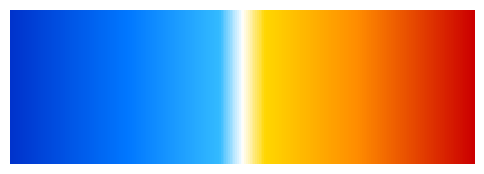

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Dynamically adjust the colormap based on min/max values
def create_dynamic_colormap(min_value, max_value):
    # Define the base colors for the colormap
    adjusted_colors_with_opacity = [
        (-1e-9, to_rgba("#0033cc", alpha=1)),  # Dark blue, fully opaque
        (-5e-10, to_rgba("#0077FF", alpha=1)),  # Medium blue, fully opaque
        (-1e-10, to_rgba("#33BBFF", alpha=1)),  # Light blue, fully opaque
        (0, to_rgba("white", alpha=1)),        # White, fully opaque for zero values
        (1e-10, to_rgba("#FFD700", alpha=1)),  # Gold, fully opaque
        (5e-10, to_rgba("#FF8C00", alpha=1)),  # Dark orange, fully opaque
        (1e-9, to_rgba("#CC0000", alpha=1))    # Bright red, fully opaque
    ]

    # Normalize the control points to the [0, 1] range
    raw_points = np.array([c[0] for c in adjusted_colors_with_opacity])
    normalized_points = (raw_points - raw_points.min()) / (raw_points.max() - raw_points.min())
    normalized_colors = [c[1] for c in adjusted_colors_with_opacity]
    # Create evenly spaced control points between min_value and max_value
    # num_colors = len(adjusted_colors_with_opacity)
    # control_points = np.linspace(min_value, max_value, num_colors)

    # # Normalize control points to [0, 1] for the colormap
    # normalized_points = np.linspace(0, 1, num_colors)#(control_points - min_value) / (max_value - min_value)

    # Create a colormap
    dynamic_cmap = LinearSegmentedColormap.from_list(
        "dynamic_colormap",
        list(zip(normalized_points,normalized_colors))# adjusted_colors_with_opacity))
    )

    return dynamic_cmap


# Create and visualize the colormap
bright_cmap = create_dynamic_colormap(-.2, .2)
bright_gradient = np.linspace(-.2, .2, 256)
bright_gradient = np.vstack((bright_gradient, bright_gradient))

fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(bright_gradient, aspect='auto', cmap=bright_cmap)
ax.set_axis_off()
plt.show()


# plot MNI

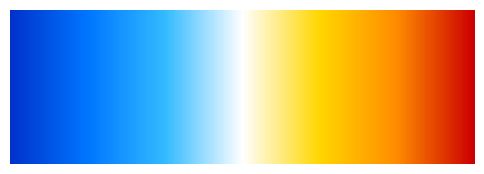

In [13]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Adjusted color definitions for clearer transitions and vivid colors
bright_colors_with_opacity = [
    (-0.000000001, to_rgba("#0033cc", alpha=1)),  # Dark blue, fully opaque
    (-0.0000000005, to_rgba("#0077FF", alpha=1)),  # Medium blue, fully opaque
    (-0.0000000001, to_rgba("#33BBFF", alpha=1)),  # Light blue, fully opaque
    (0, to_rgba("white", alpha=1)),  # White, fully opaque for zero values
    (0.0000000001, to_rgba("#FFD700", alpha=1)),  # Gold, fully opaque
    (0.0000000005, to_rgba("#FF8C00", alpha=1)),  # Dark orange, fully opaque
    (0.000000001, to_rgba("#CC0000", alpha=1))  # Bright red, fully opaque
]


# Normalize the points to the [0, 1] interval for the colormap
bright_norm_points = np.linspace(0, 1, len(bright_colors_with_opacity))

# Prepare the colors for the colormap
bright_norm_colors = [c[1] for c in bright_colors_with_opacity]

# Create the bright custom colormap
bright_cmap = LinearSegmentedColormap.from_list("bright_custom_gradient", list(zip(bright_norm_points, bright_norm_colors)))

# Create a gradient to visualize the bright colormap
bright_gradient = np.linspace(0, 1, 256)
bright_gradient = np.vstack((bright_gradient, bright_gradient))

# Plot the gradient for the bright colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(bright_gradient, aspect='auto', cmap=bright_cmap)
ax.set_axis_off()
plt.show()


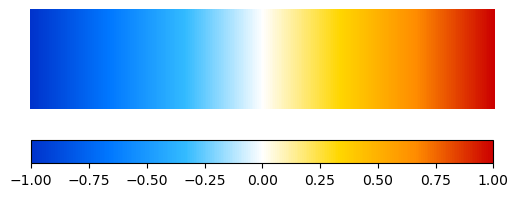

In [14]:
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Adjusted color definitions for clearer transitions and vivid colors
bright_colors_with_opacity = [
    to_rgba("#0033cc", alpha=1),  # Dark blue, fully opaque
    to_rgba("#0077FF", alpha=1),  # Medium blue, fully opaque
    to_rgba("#33BBFF", alpha=1),  # Light blue, fully opaque
    to_rgba("white", alpha=1),    # White, fully opaque for zero values
    to_rgba("#FFD700", alpha=1),  # Gold, fully opaque
    to_rgba("#FF8C00", alpha=1),  # Dark orange, fully opaque
    to_rgba("#CC0000", alpha=1)   # Bright red, fully opaque
]

# Normalize the points to the [0, 1] interval for the colormap
bright_norm_points = np.linspace(0, 1, len(bright_colors_with_opacity))

# Create the bright custom colormap
bright_cmap = LinearSegmentedColormap.from_list(
    "bright_custom_gradient",
    list(zip(bright_norm_points, bright_colors_with_opacity))
)

# Generate data for visualization
data = np.linspace(-1, 1, 500).reshape(1, -1)  # Gradient from -1 to 1

# Use TwoSlopeNorm to ensure zero maps to white
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Plot the gradient for the bright colormap
fig, ax = plt.subplots(figsize=(6, 2))
im = ax.imshow(data, aspect='auto', cmap=bright_cmap, norm=norm)
ax.set_axis_off()
plt.colorbar(im, ax=ax, orientation="horizontal", pad=0.2)
plt.show()


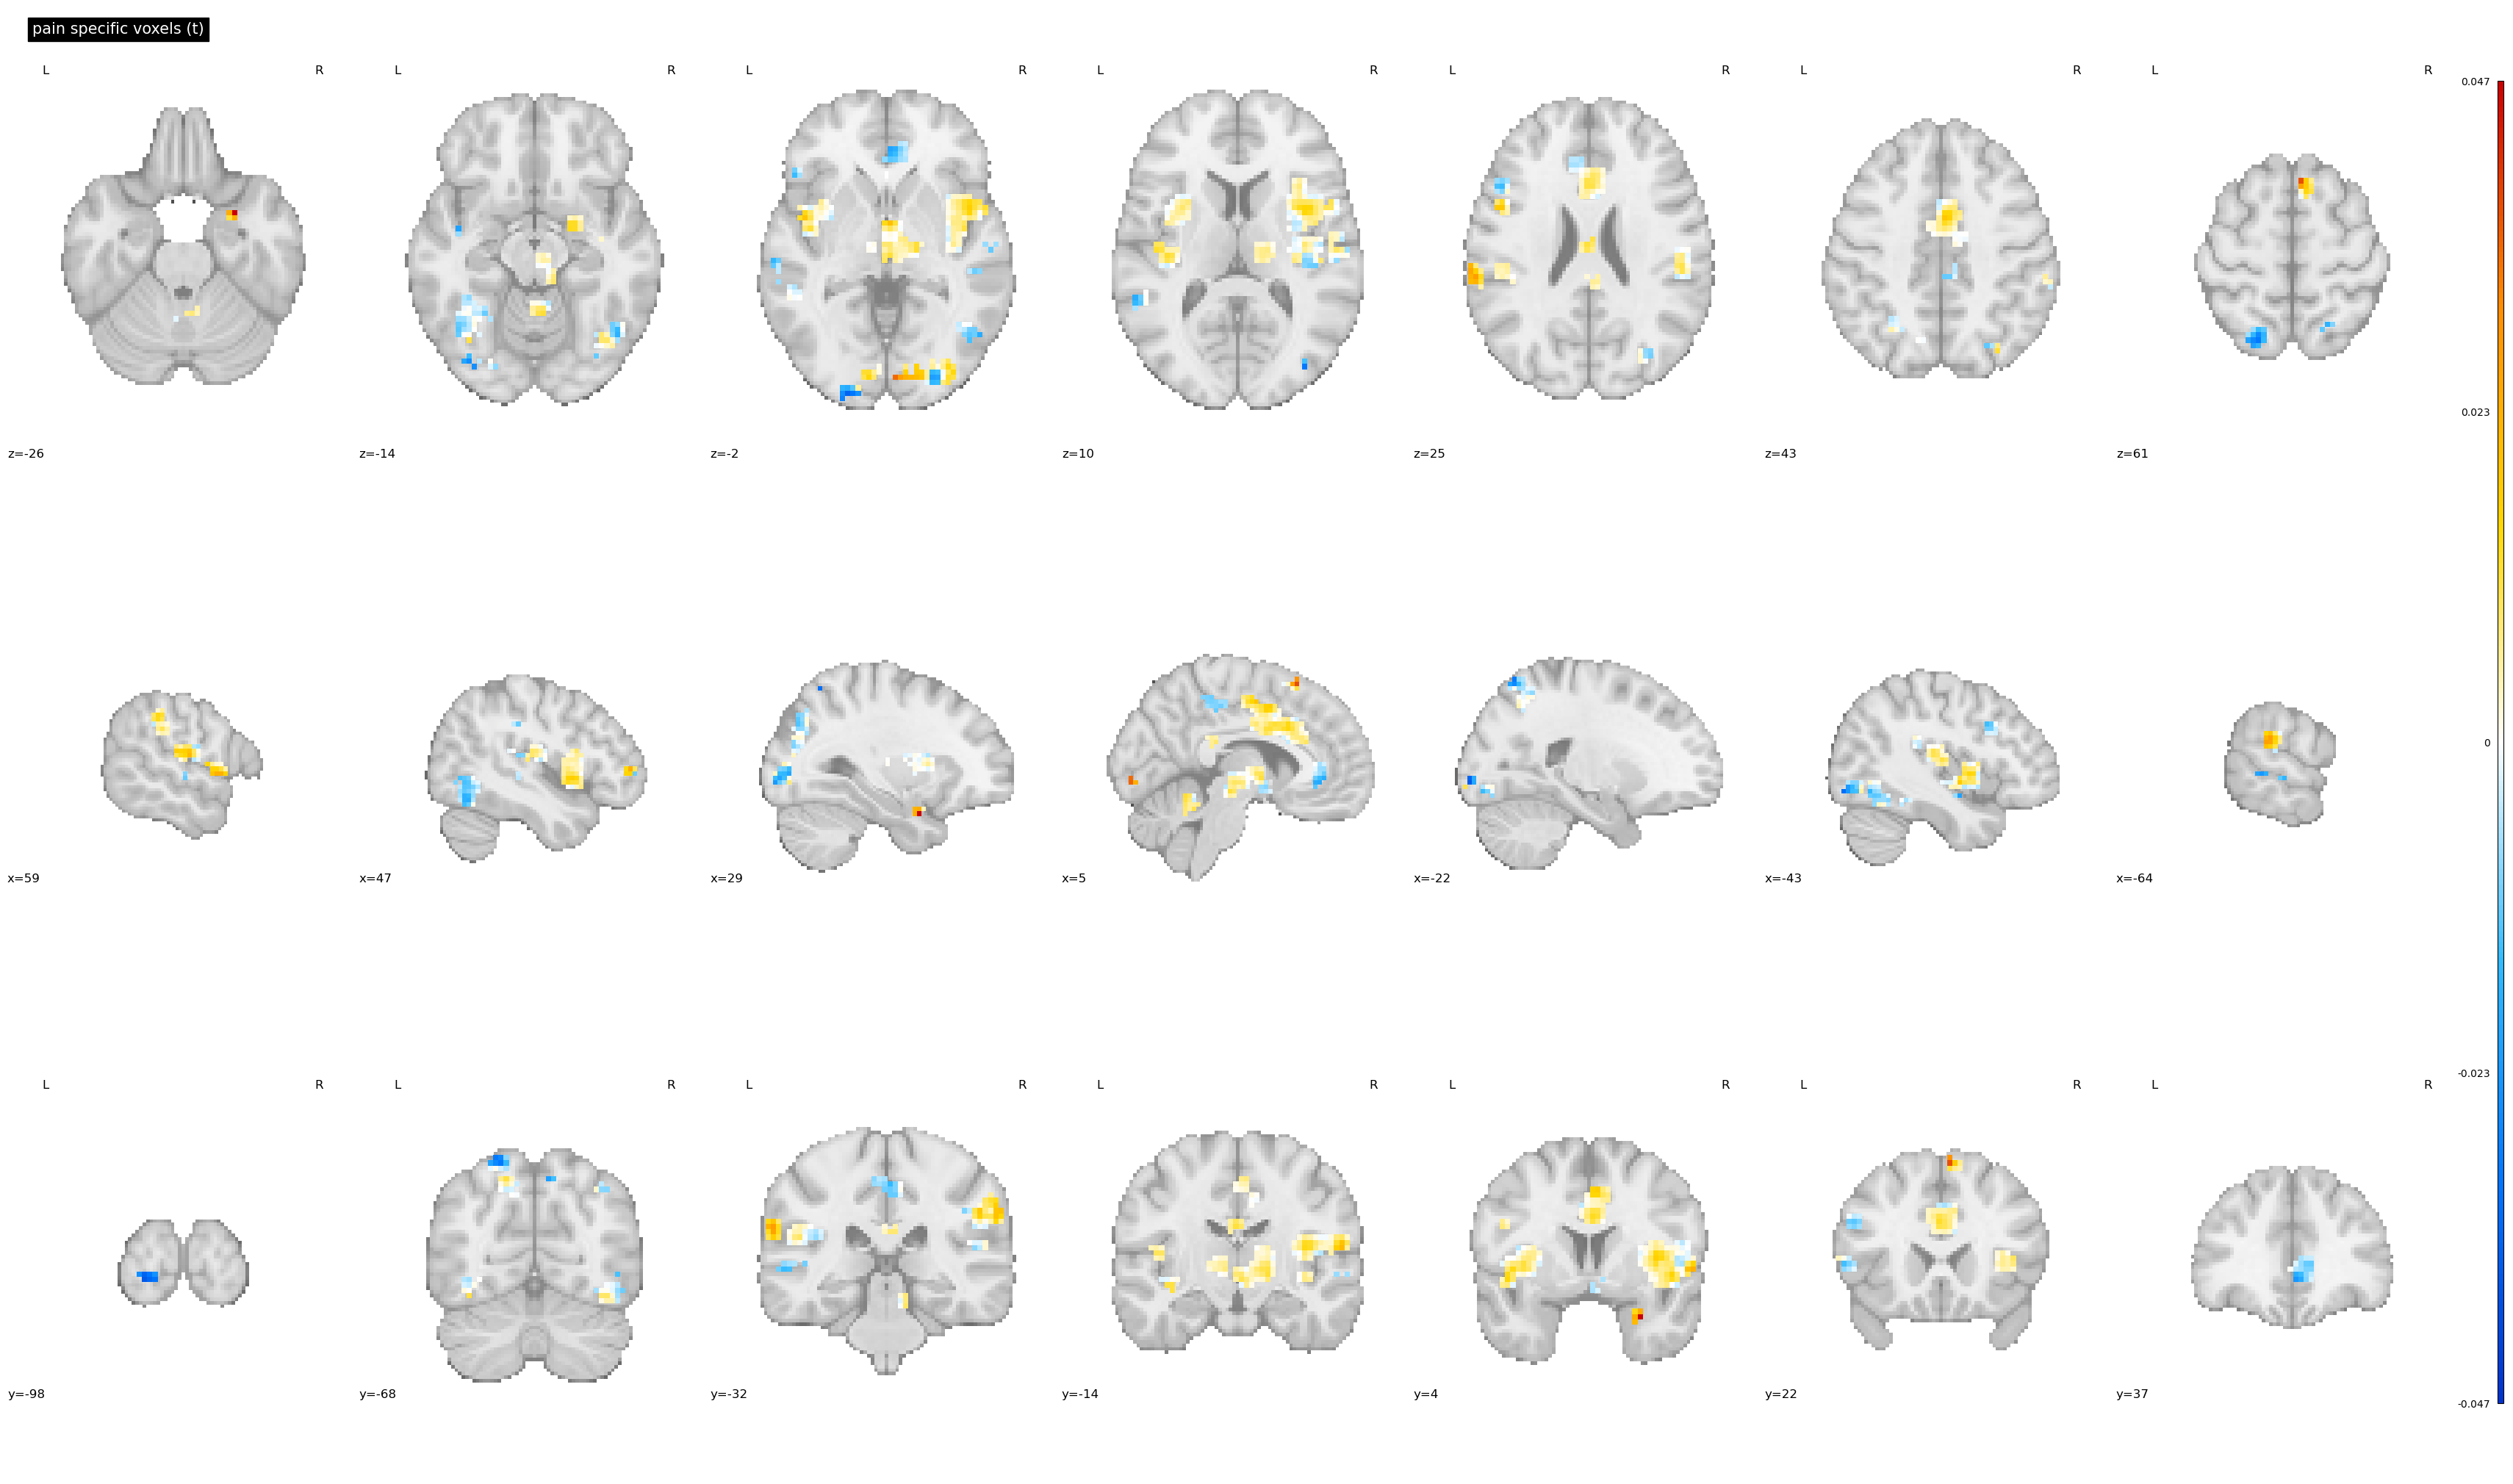

In [15]:
NPSmni = plotting.plot_stat_map(image.load_img(NPS), display_mode='mosaic', title='pain specific voxels (t)', cmap=bright_cmap)


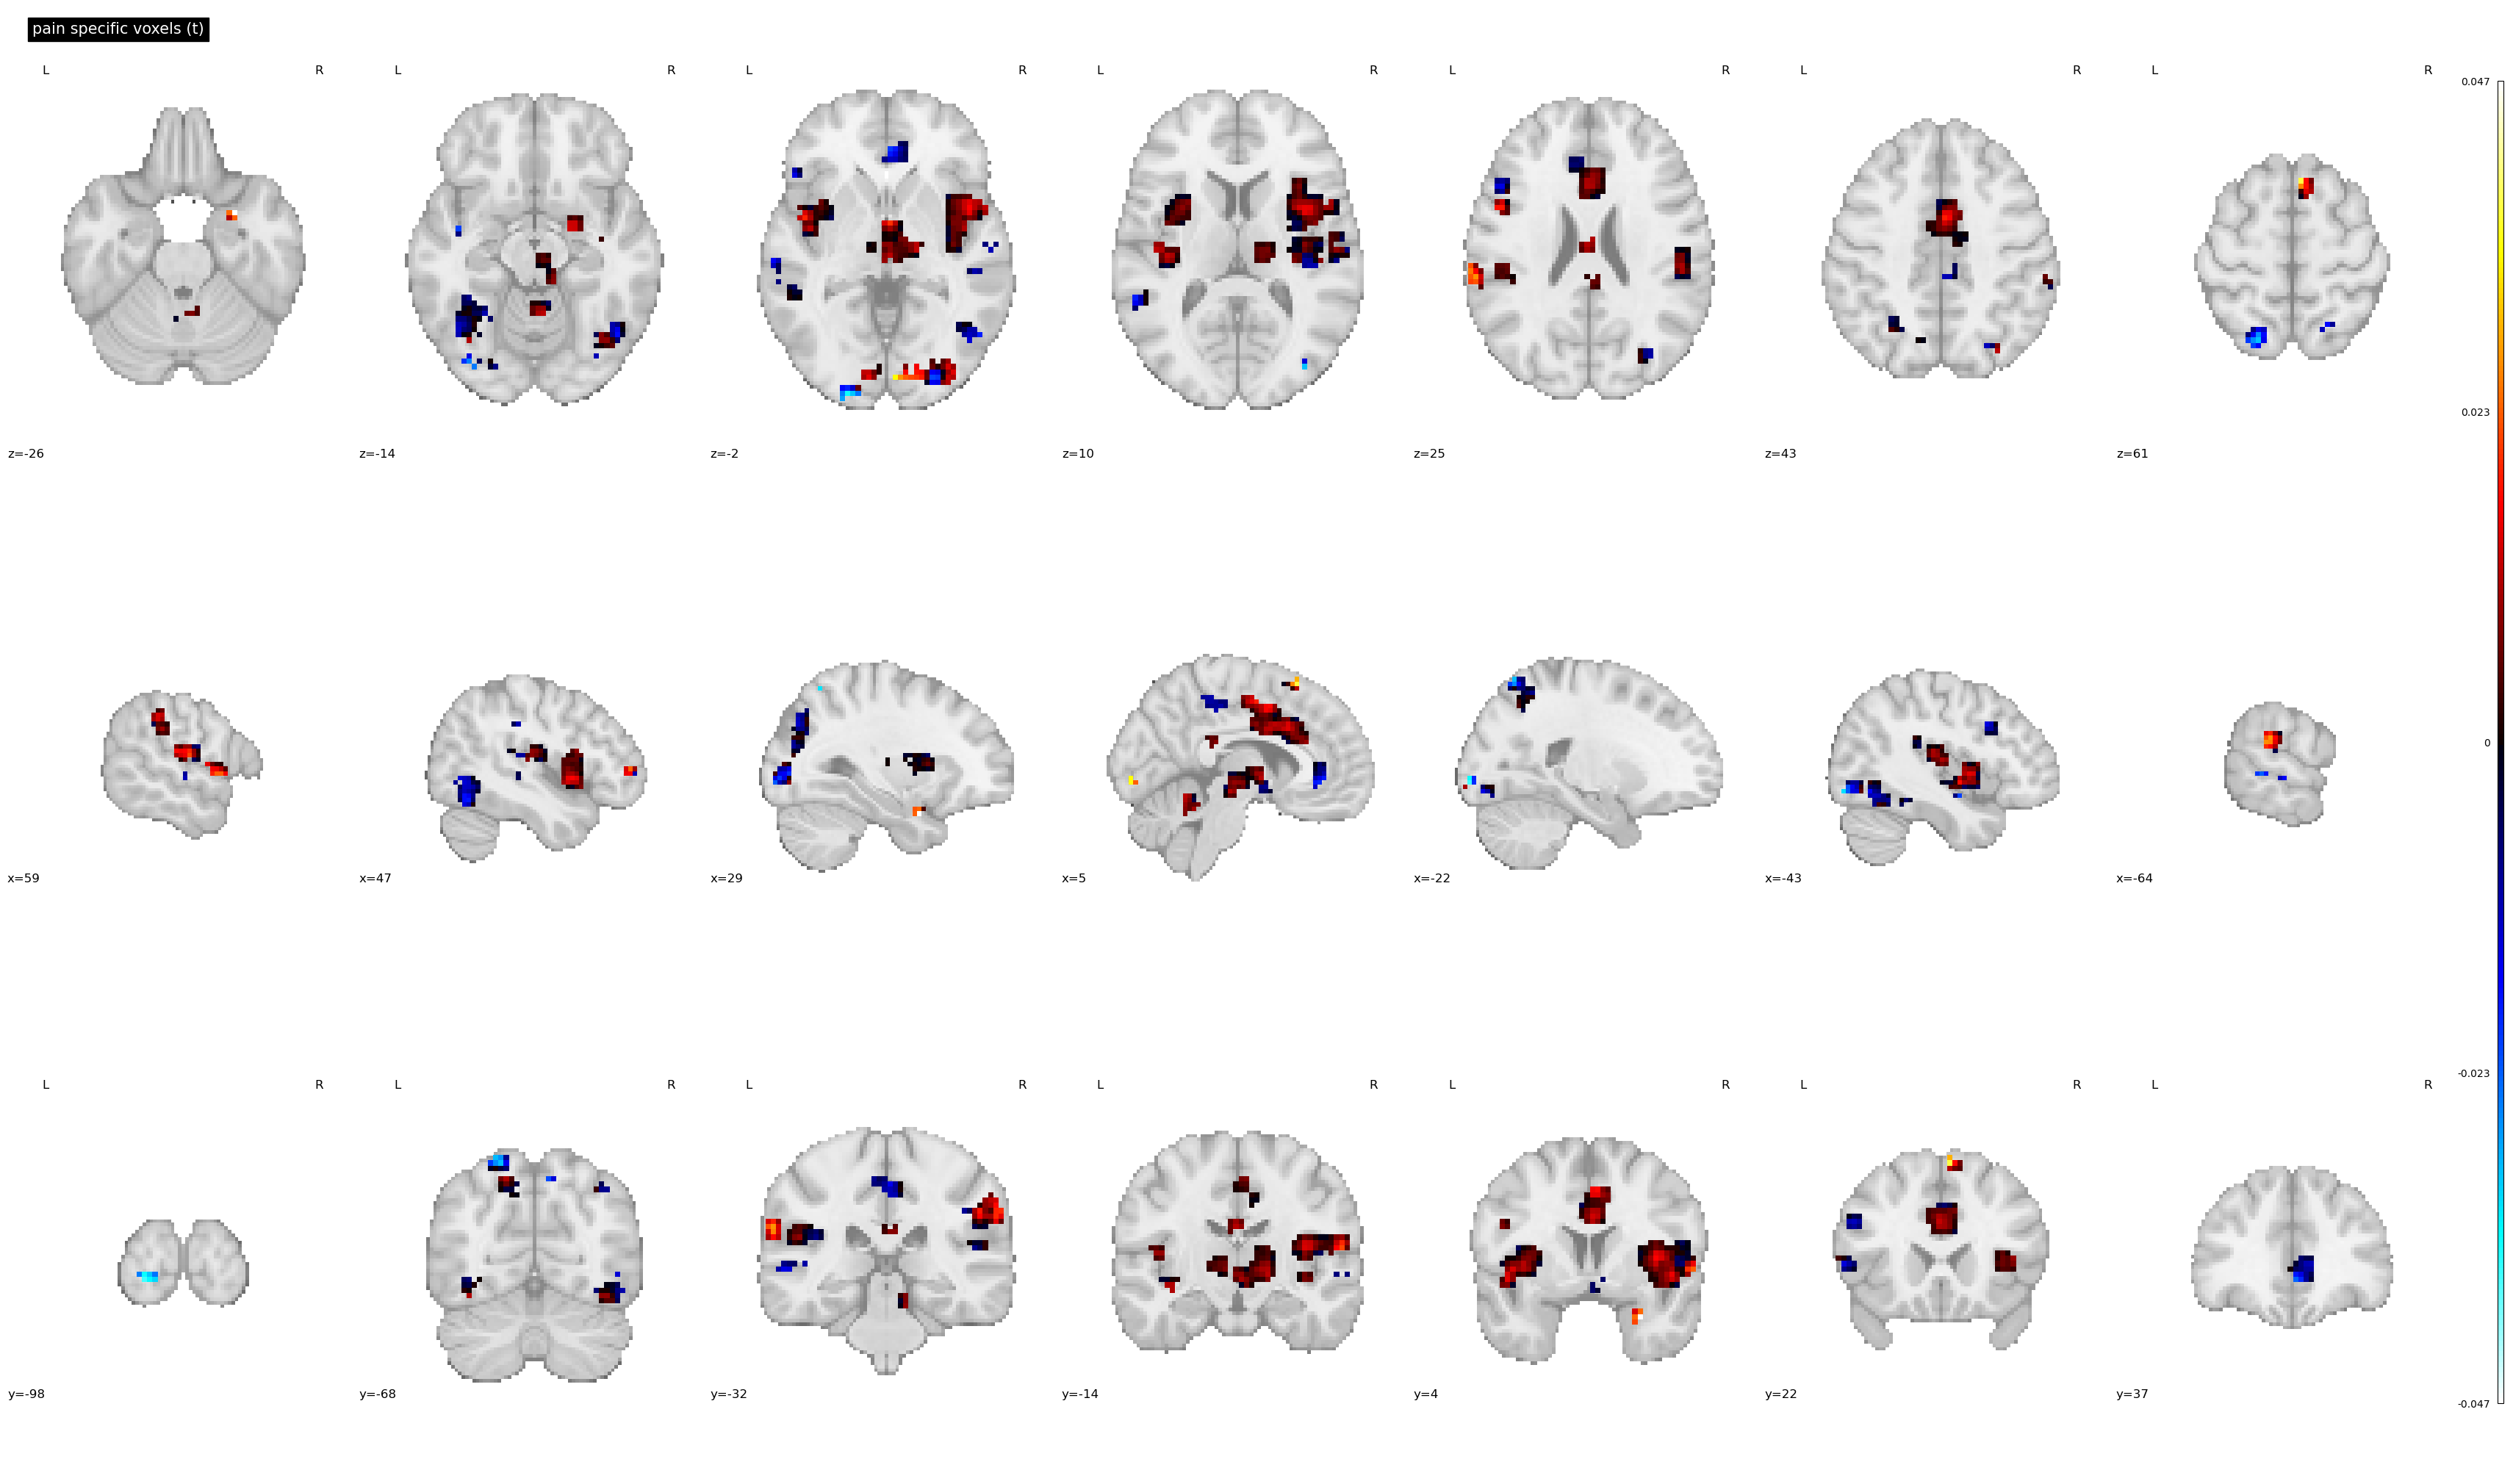

In [11]:
NPSmni = plotting.plot_stat_map(image.load_img(NPS), display_mode='mosaic', title='pain specific voxels (t)')


# surface space

# Plot 1. NPS threshold

pain range: 0.029916884377598763 -0.023853827267885208


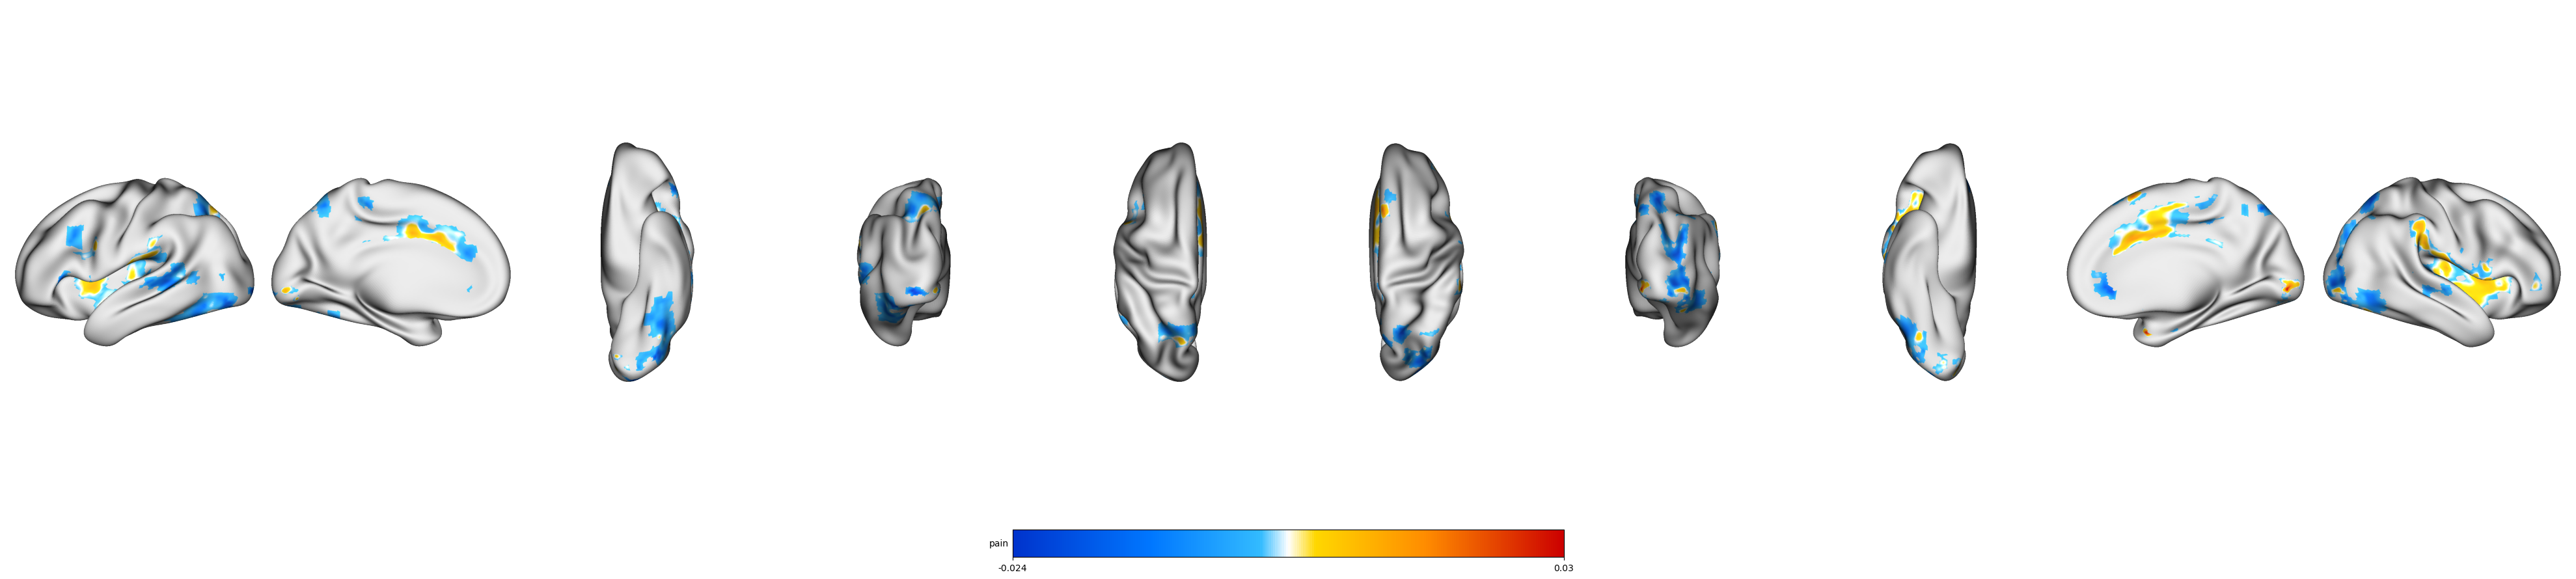

In [18]:
pain_stim_fslr = transforms.mni152_to_fslr(NPS, fslr_density='32k', 
    method='linear')
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()))
min_pain = min(np.min(pain_stim_fslr[0].agg_data()), np.min(pain_stim_fslr[1].agg_data()))
print(f"pain range: {max_pain} {min_pain}")

dynamic_cmap = create_dynamic_colormap(min_pain, max_pain)#np.round(np.max(max_pain)))
# cm.register_cmap(name="dynamic_pain_cmap", cmap=dynamic_cmap)
p = plot_brain_surfaces(pain_stim_fslr, cbar_label='pain', cmap=dynamic_cmap,#cmap='bwr_r',#'RdYlBu_r', 
                        remove_medial_wall=True)#, color_range=(min_pain, max_pain))


# no threshold

pain range: 0.029916884377598763 -0.023853827267885208


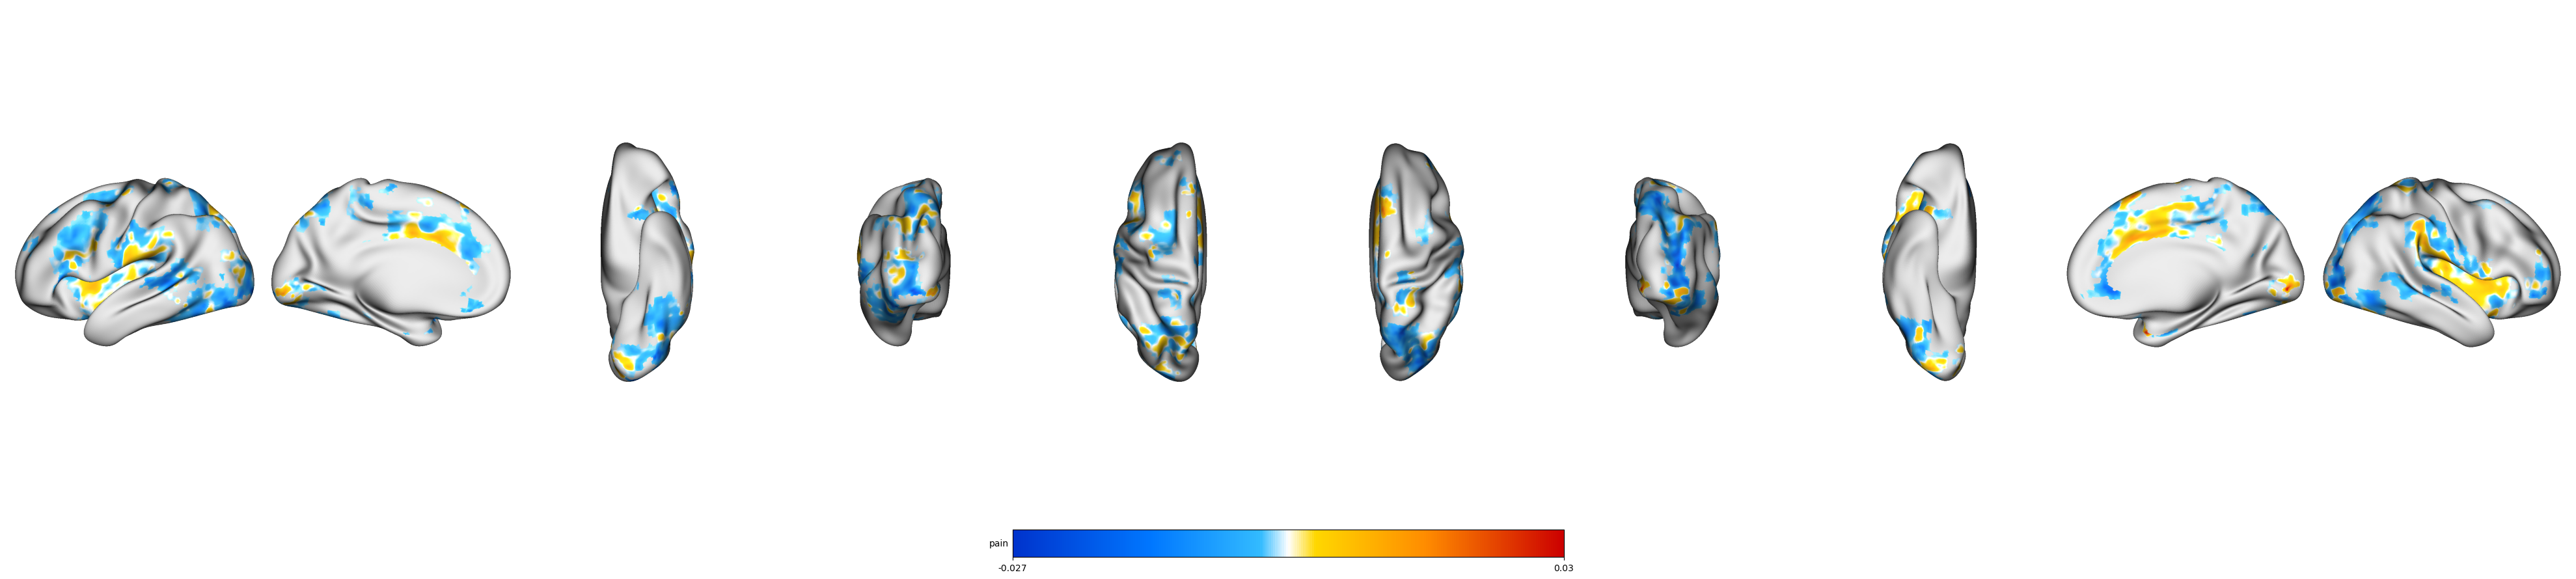

In [27]:
# step 1: save .img to .nii.gz
nps_fname = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.img'
img = nib.load(nps_fname)
NPS_nothres = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.nii.gz'
nib.save(img, NPS_nothres)

# step 2: convert MNI to FSLR
NPS_nothres_fslr = transforms.mni152_to_fslr(NPS_nothres, fslr_density='32k', 
    method='linear')
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()))
min_pain = min(np.min(pain_stim_fslr[0].agg_data()), np.min(pain_stim_fslr[1].agg_data()))
print(f"pain range: {max_pain} {min_pain}")

# step 3: create colormap and plot in FSLR
dynamic_cmap = create_dynamic_colormap(min_pain, max_pain)
# cm.register_cmap(name="dynamic_pain_cmap", cmap=dynamic_cmap)

# step 4: plot surface brain
p = plot_brain_surfaces(NPS_nothres_fslr, cbar_label='pain', cmap=dynamic_cmap,#cmap='bwr_r',#'RdYlBu_r', 
                        remove_medial_wall=True) #, color_range=(min_pain, max_pain))

# step 5: save figure
output_path = os.path.join(fig_savedir, 'NPS_surfplot.png')
p.savefig(output_path, dpi=300, bbox_inches='tight')  

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 5.0000e+00, 2.0000e+00, 9.0000e+00, 3.0000e+00,
        1.1000e+01, 4.0000e+00, 9.0000e+00, 1.8000e+01, 2.1000e+01,
        2.4000e+01, 2.2000e+01, 2.9000e+01, 3.0000e+01, 4.5000e+01,
        4.7000e+01, 5.3000e+01, 6.3000e+01, 7.7000e+01, 1.0100e+02,
        1.3100e+02, 1.5600e+02, 1.7500e+02, 1.9400e+02, 2.1900e+02,
        2.9400e+02, 3.2600e+02, 3.2200e+02, 4.1100e+02, 4.8100e+02,
        5.4200e+02, 5.7800e+02, 2.6239e+05, 5.8400e+02, 5.5800e+02,
        5.1900e+02, 5.0100e+02, 4.2400e+02, 3.8500e+02, 3.2000e+02,
        2.5900e+02, 2.4600e+02, 1.9900e+02, 1.6000e+02, 1.1600e+02,
        1.1500e+02, 7.2000e+01, 8.8000e+01, 5.0000e+01, 4.5000e+01,
        2.9000e+01, 3.2000e+01, 2.1000e+01, 1.7000e+01, 2.1000e+01,
        9.0000e+00, 6.0000e+00, 7.0000e+00, 1.00

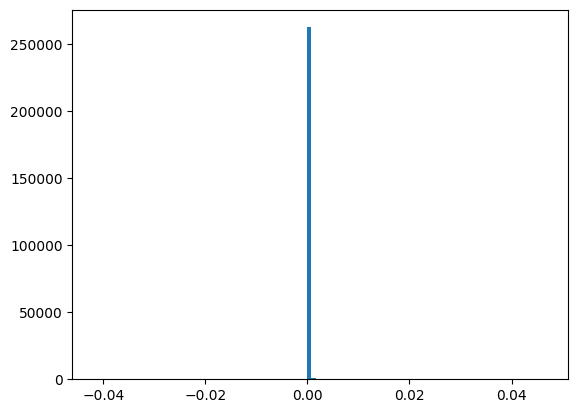

In [ ]:
plt.hist(image.load_img(NPS).get_fdata().ravel(), 100)

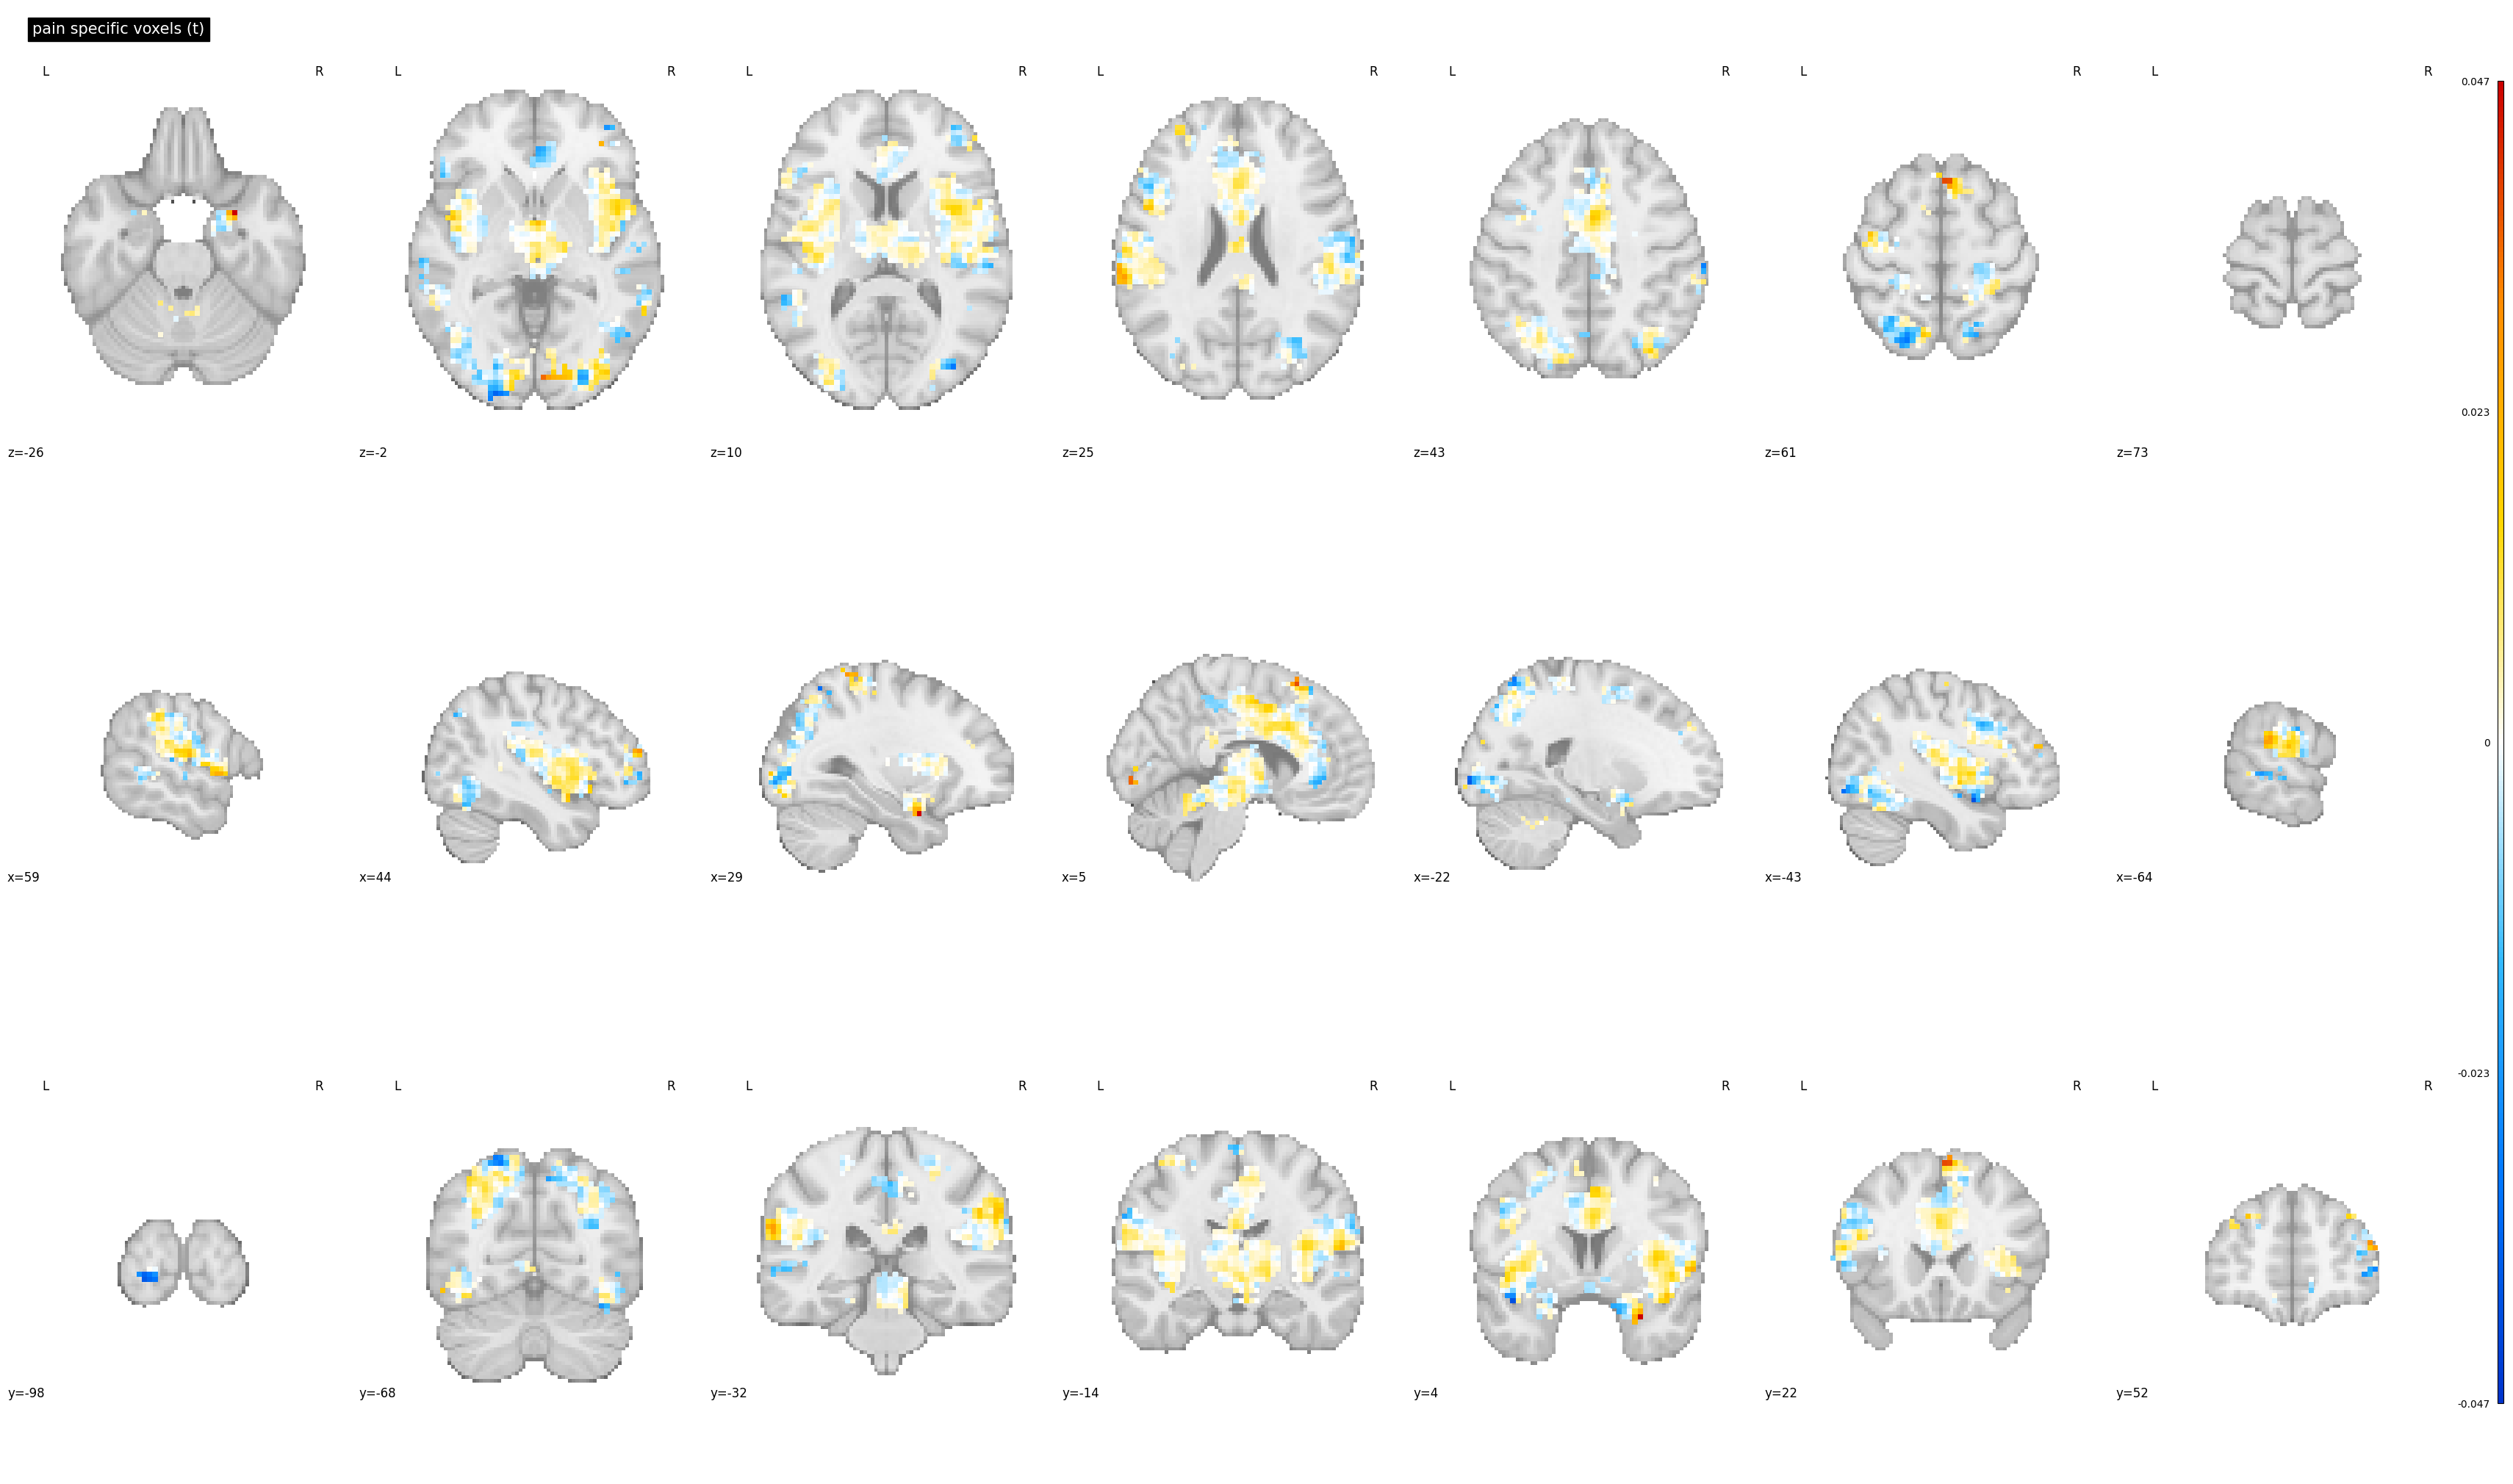

In [ ]:
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
NPS = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.nii.gz'
NPSmni = plotting.plot_stat_map(image.load_img(NPS), display_mode='mosaic', title='pain specific voxels (t)',cmap=bright_cmap)
                                # nilearn_cmaps['cold_white_hot'] )


## Plot 3. SIIPS

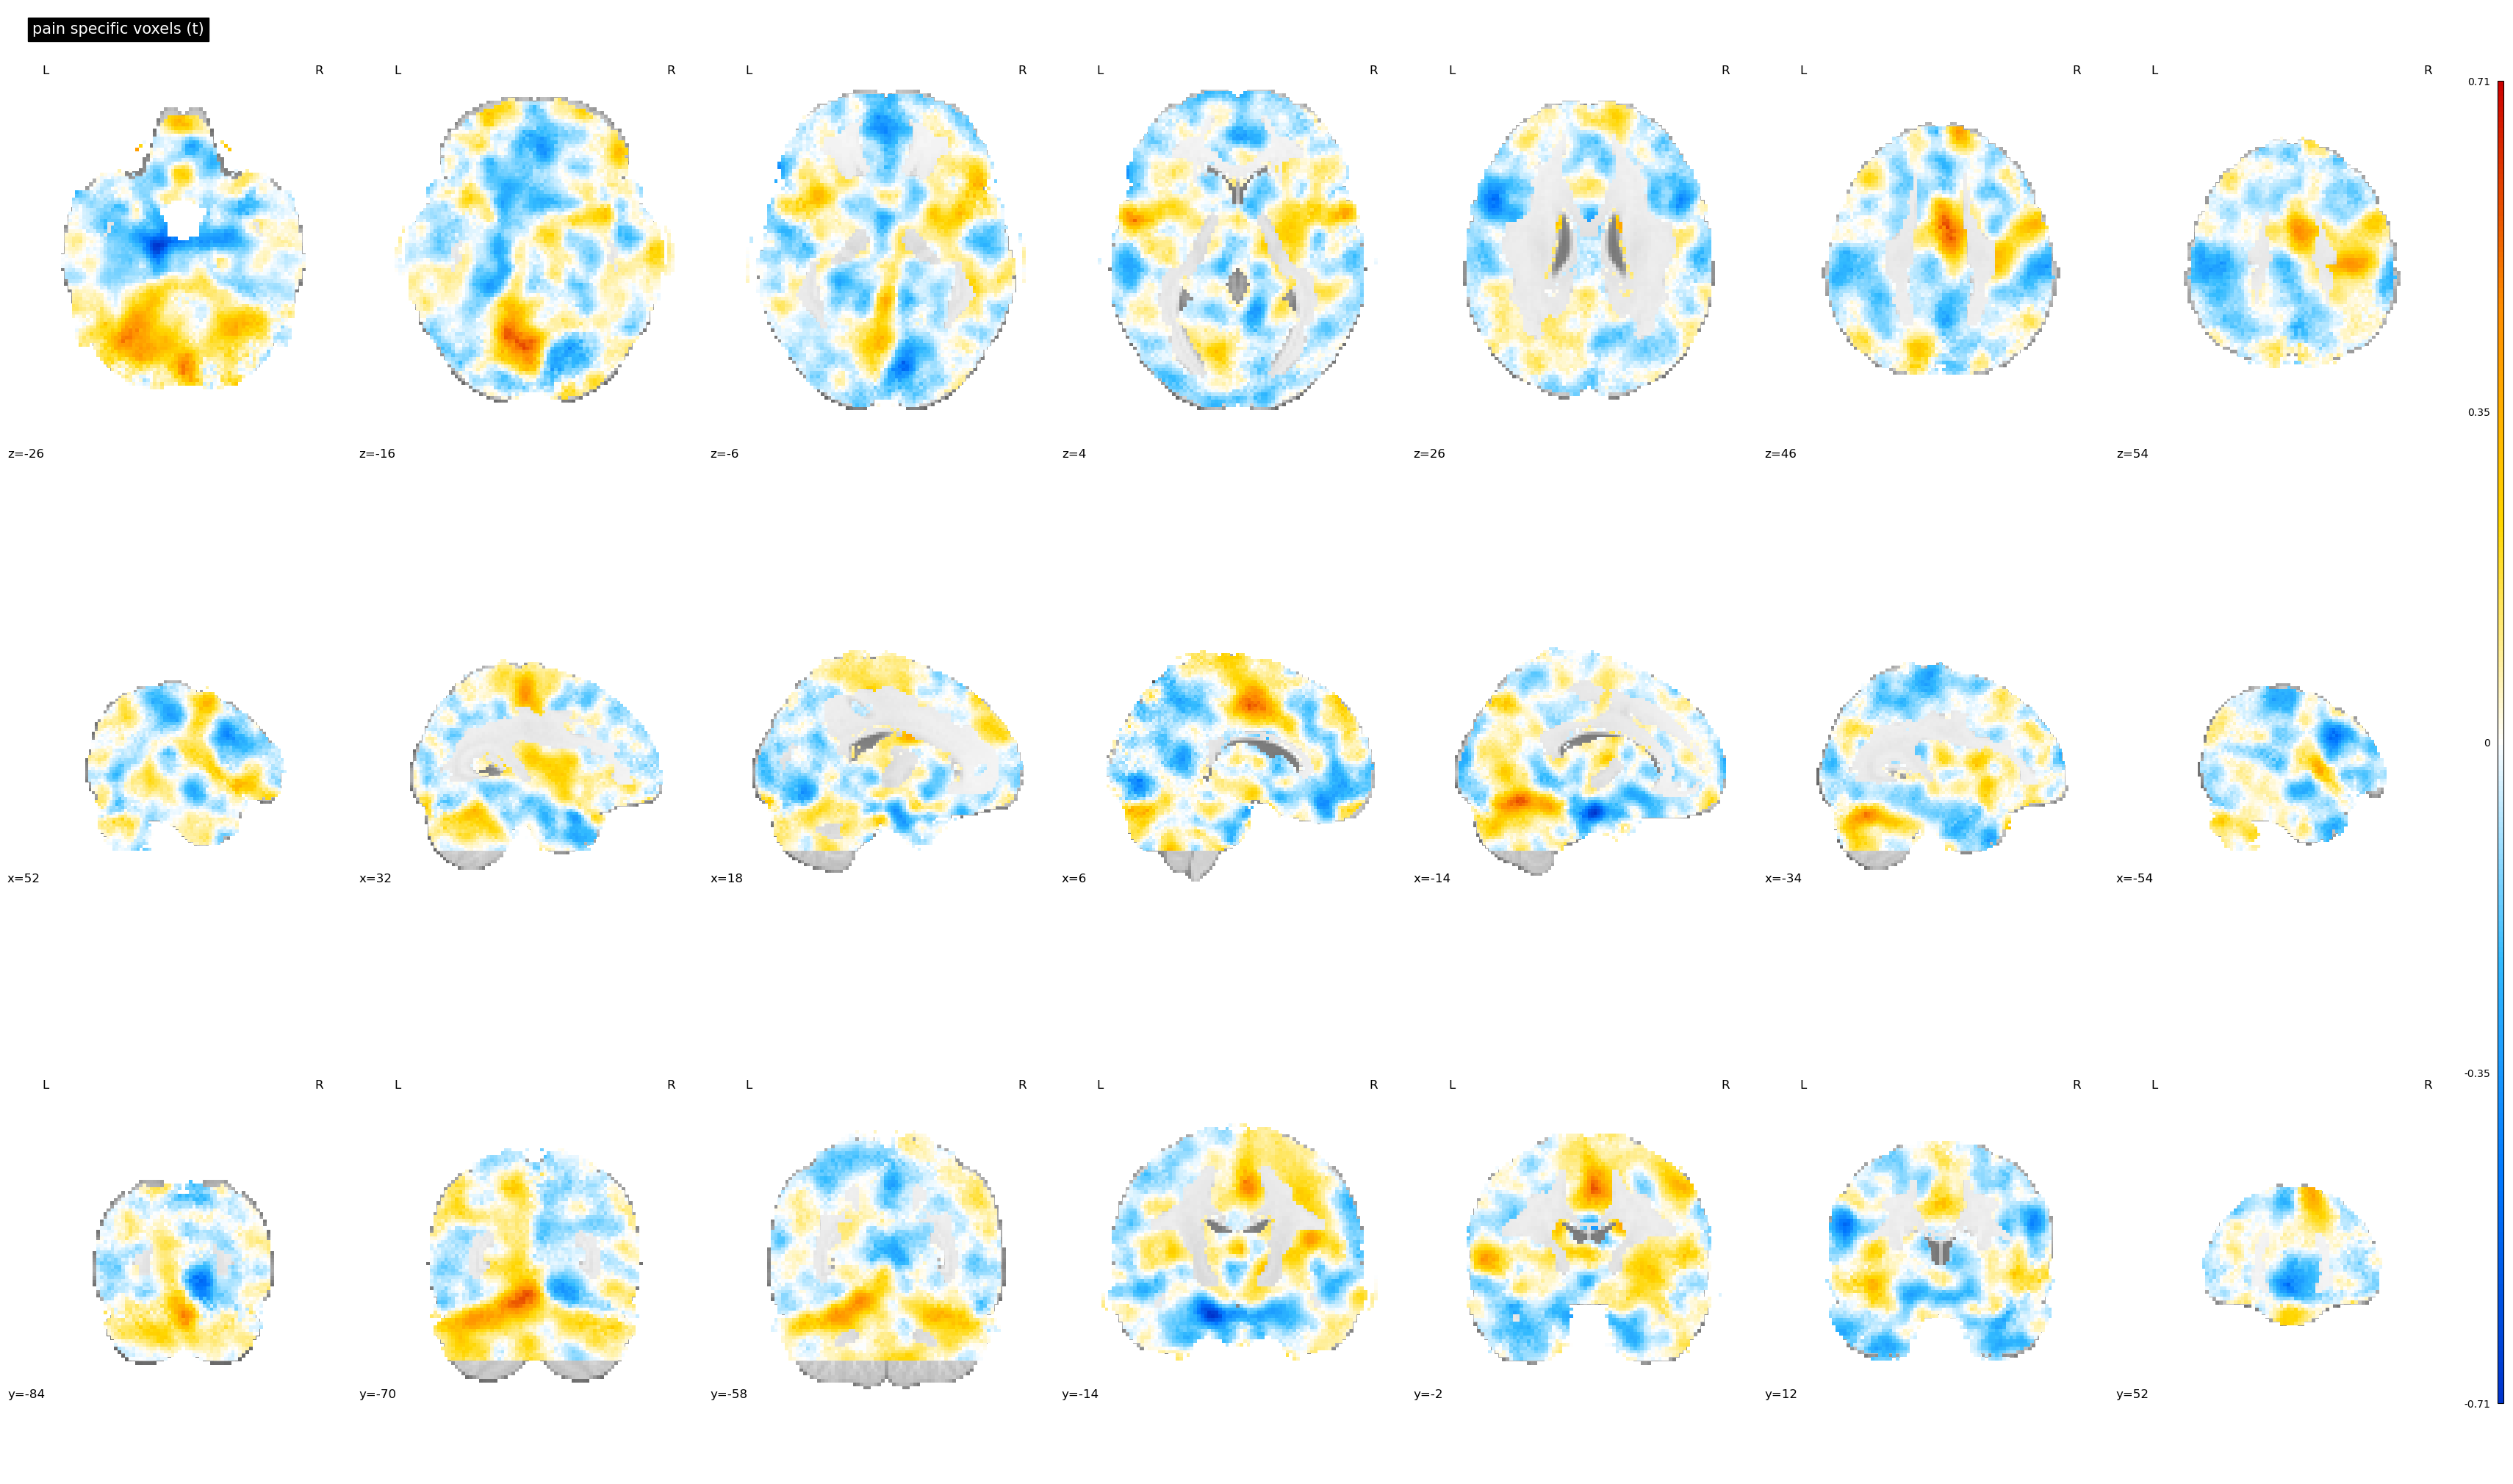

In [31]:
siips_fname = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Multivariate_signature_patterns/2017_Woo_SIIPS1/nonnoc_v11_4_137subjmap_weighted_mean.nii.gz'
SIIPSMNI = plotting.plot_stat_map(image.load_img(siips_fname), display_mode='mosaic', title='pain specific voxels (t)',cmap=bright_cmap)
                                # nilearn_cmaps['cold_white_hot'] )


pain range: 0.5010662078857422 -0.6214081645011902


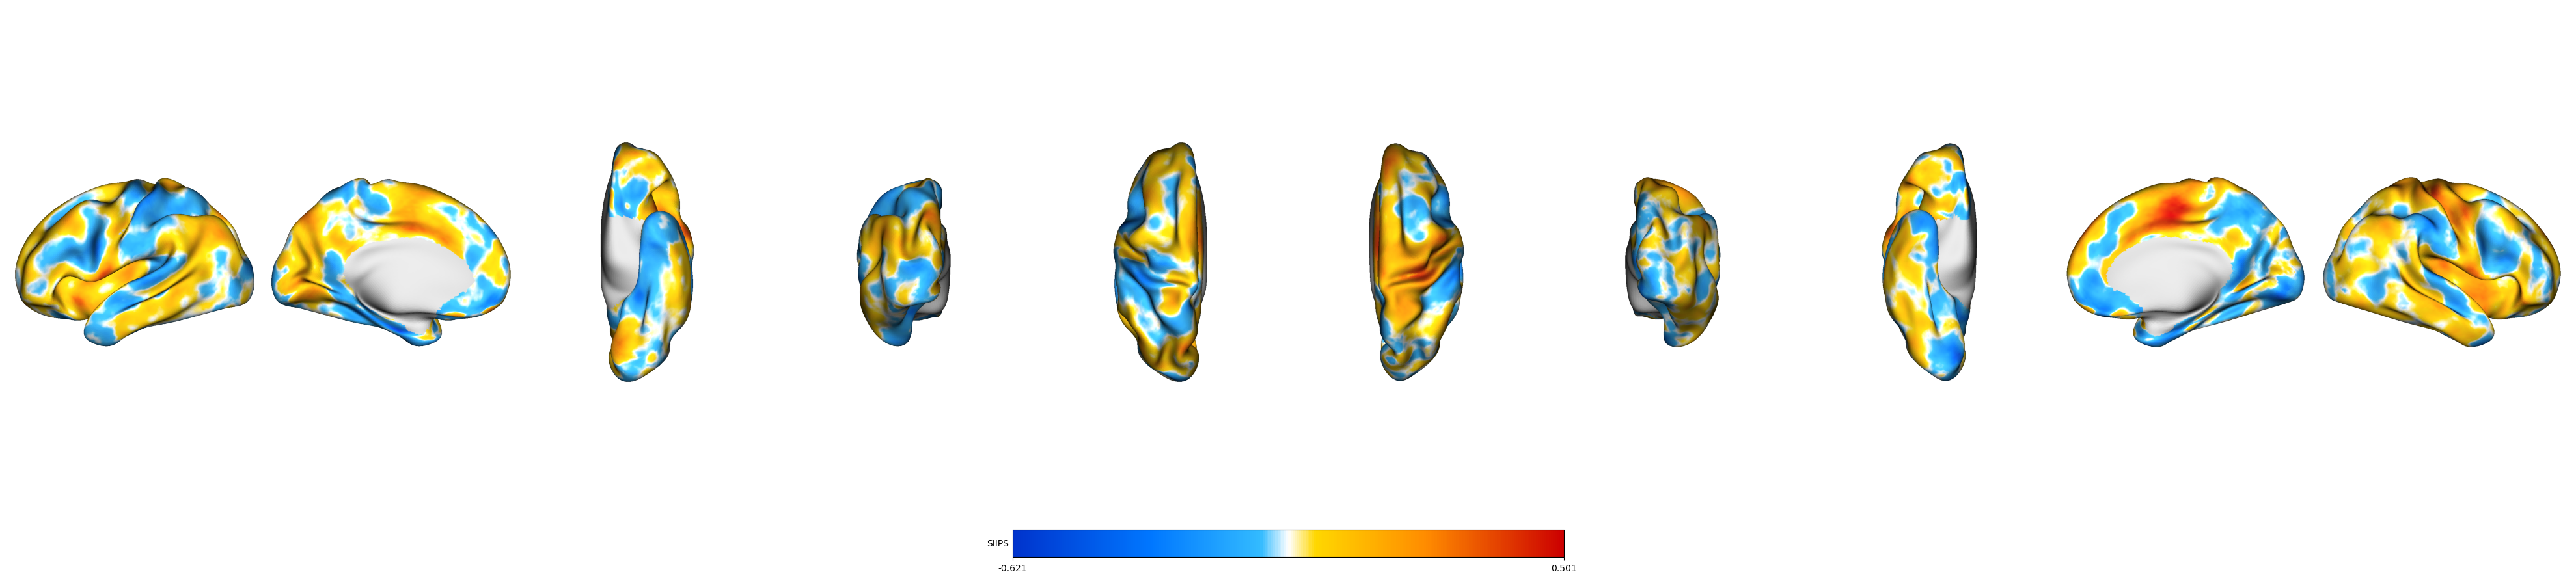

In [32]:
# step 1: transform SIIPS mni to fslr
SIIPS_fslr = transforms.mni152_to_fslr(siips_fname, fslr_density='32k', 
    method='linear')
max_pain = max(np.max(SIIPS_fslr[0].agg_data()), np.max(SIIPS_fslr[1].agg_data()))
min_pain = min(np.min(SIIPS_fslr[0].agg_data()), np.min(SIIPS_fslr[1].agg_data()))
print(f"pain range: {max_pain} {min_pain}")
max_pain = max(np.max(SIIPS_fslr[0].agg_data()), np.max(SIIPS_fslr[1].agg_data()),
              np.abs(np.min(SIIPS_fslr[0].agg_data())), np.abs(np.max(SIIPS_fslr[0].agg_data())))
# pain_stim_fslr[0].agg_data()[medial_wall_mask] = np.nan
# pain_stim_fslr[1].agg_data()[medial_wall_mask] = np.nan

# step 2: plot surface
p = plot_brain_surfaces(SIIPS_fslr, cbar_label='SIIPS', cmap=dynamic_cmap )#nilearn_cmaps['cold_white_hot'] )
                    # color_range=(-np.round(max_pain), np.round(np.max(max_pain))))

# step 3: save figure
siips_savefname = os.path.join(fig_savedir, 'SIIPS_surfplot.png')
p.savefig(siips_savefname, dpi=300, bbox_inches='tight')  